# The Sparks Foundation GRIP
## Data Science and Business Analytics Internship
Task-5  #gripnov21


# Exploratory Data Analysis on 'Indian Premier League'
* Perform Exploratory Data Analysis' on Indian Premier League'
* As a sports analysis,find out the most successfull teams,players and factors contributing win or loss of a team
* suggest teams or players a company should endorse for its products
* Dataset: [Indian-Premier-League](https://bit.ly/34SRn3b)

## Author: Shweta Shete

In [1]:
#importing liabraries
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [3]:
#loading dataset
df=pd.read_csv('matches.csv',index_col=0)
delivery=pd.read_csv('deliveries.csv')
df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#shape of data
df.shape

(756, 17)

In [6]:
#duplicates
df[df.duplicated()]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,


In [9]:
#missing data
df_missing=pd.DataFrame({'Count':df.isna().sum(),'Percentage':(df.isna().sum()/len(df))*100})
df_missing.sort_values(by='Count',ascending=False)

<IPython.core.display.Javascript object>

,Count,Percentage
umpire3,637,84.259259
city,7,0.925926
winner,4,0.529101
player_of_match,4,0.529101
umpire2,2,0.264550
umpire1,2,0.264550
venue,0,0.000000
win_by_wickets,0,0.000000
win_by_runs,0,0.000000
season,0,0.000000


In [10]:
df=df.drop('umpire3',1)

In [11]:
print('The data before dropping null values ' ,df.shape)
df=df.dropna(axis=0)
print('The data after dropping null values  ' ,df.shape)

The data before dropping null values  (756, 16)
The data after dropping null values   (743, 16)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

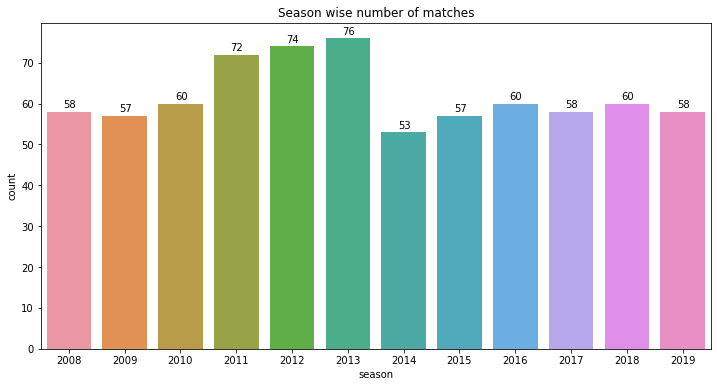

In [16]:
#season wise number of matches
plt.figure(figsize=(12,6))
ax=sns.countplot(df['season'])
plt.title('Season wise number of matches')
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

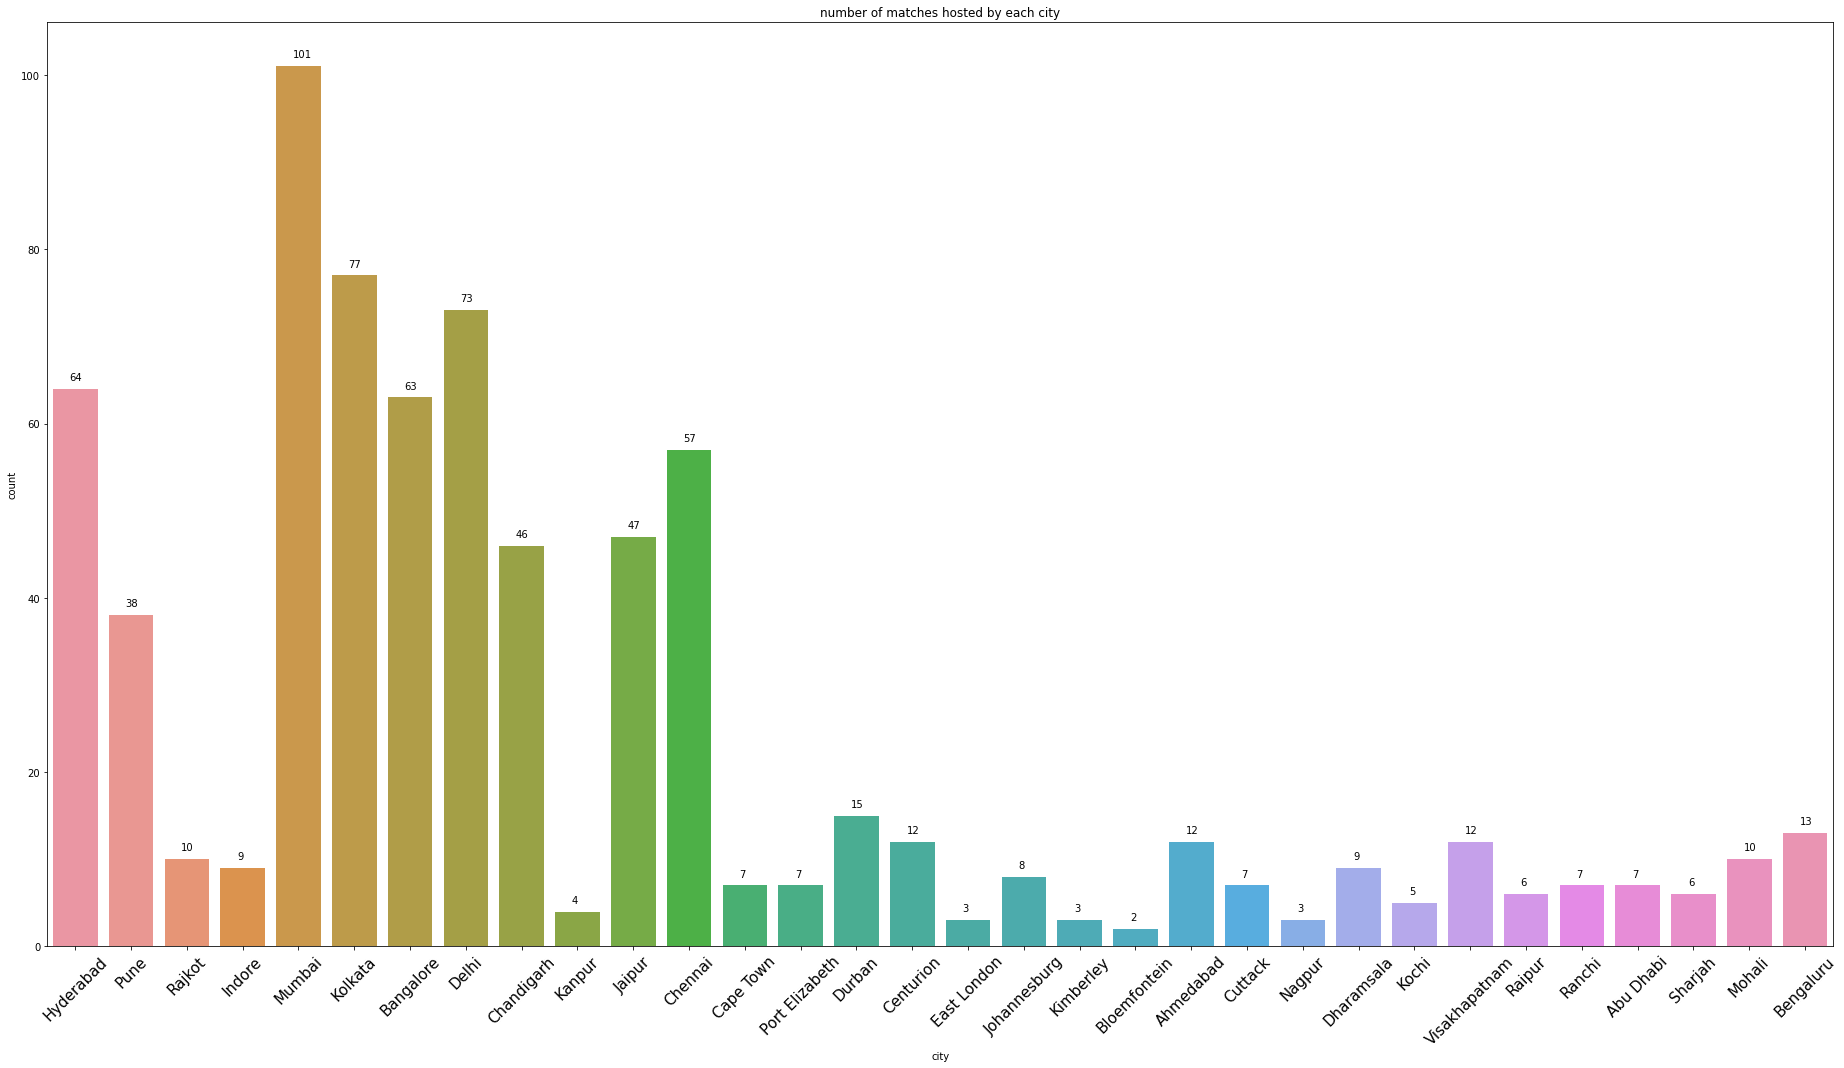

In [19]:
#city hosted more number of matches
plt.figure(figsize=(32,17))
ax=sns.countplot(df['city'])
plt.title('number of matches hosted by each city')
plt.xticks(rotation=45,fontsize=15)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

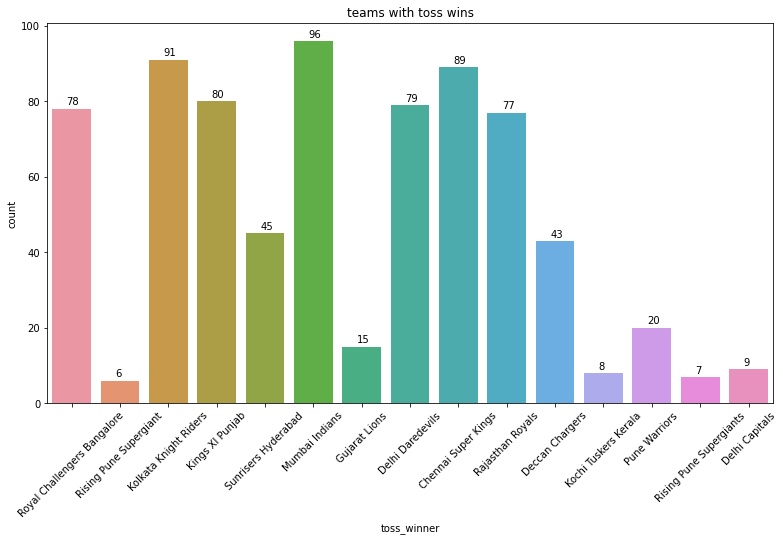

In [20]:
#teams with toss wins
plt.figure(figsize=(13,7))
ax=sns.countplot(df['toss_winner'])
plt.title('teams with toss wins')
plt.xticks(rotation=45,fontsize=10)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

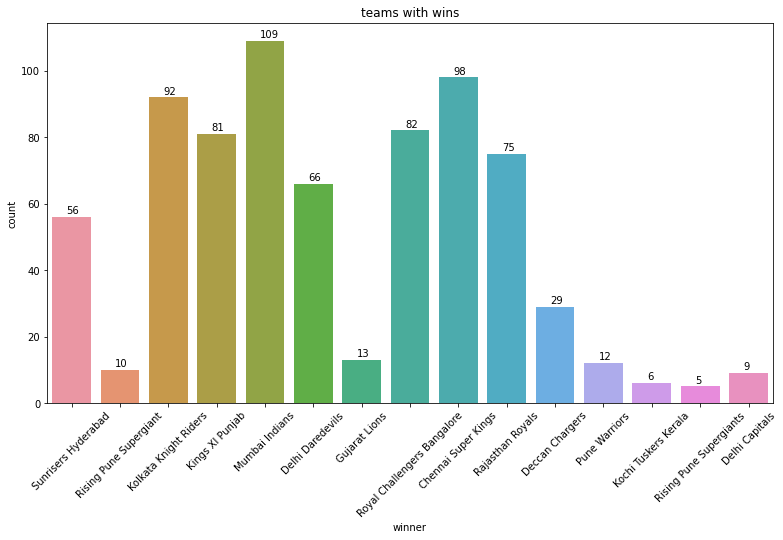

In [21]:
#teams with wins
plt.figure(figsize=(13,7))
ax=sns.countplot(df['winner'])
plt.title('teams with wins')
plt.xticks(rotation=45,fontsize=10)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

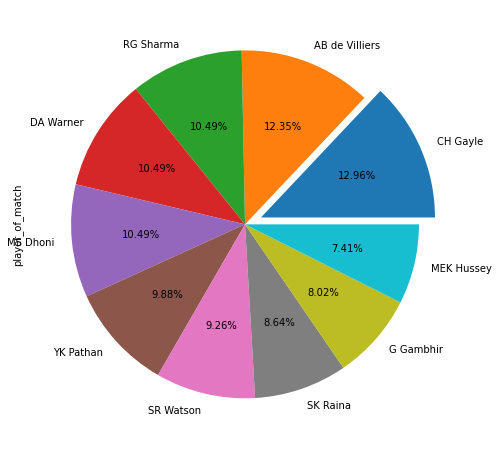

In [26]:
#teams with wins
plt.figure(figsize=(13,8))
explode=[0.1,0,0,0,0,0,0,0,0,0]
df['player_of_match'].value_counts().head(10).plot(kind='pie',autopct='%0.2f%%',explode=explode)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

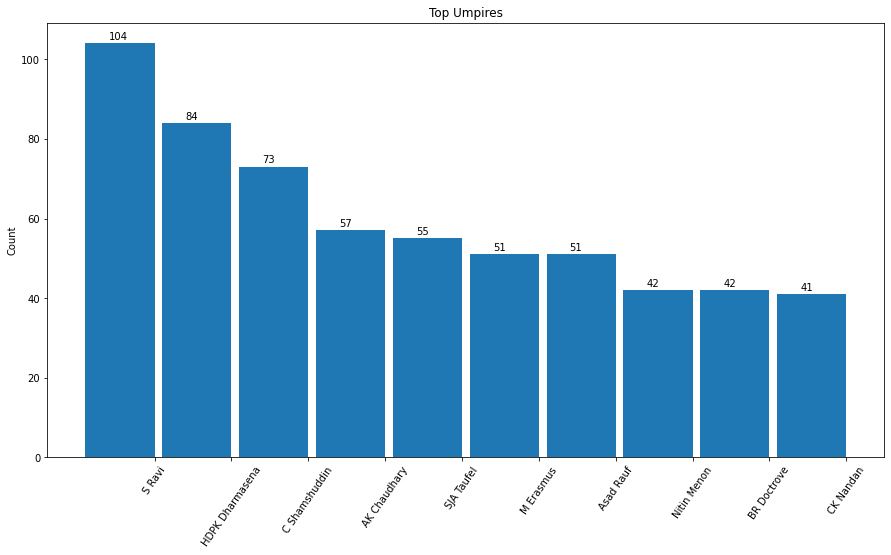

In [29]:
temp_df=pd.melt(df,value_vars=['umpire1','umpire2'])
temp_series=temp_df.value.value_counts()[:10]
labels=np.array(temp_series.index)
ind=np.arange(len(labels))
width=0.9
fig,ax=plt.subplots(figsize=(15,8))
rects=ax.bar(ind,np.array(temp_series),width=width,)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels,rotation=55)
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

In [30]:
champ=df.drop_duplicates(subset=['season'],keep='last')[['season','winner']].reset_index(drop=True)
champ.sort_values(by='season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

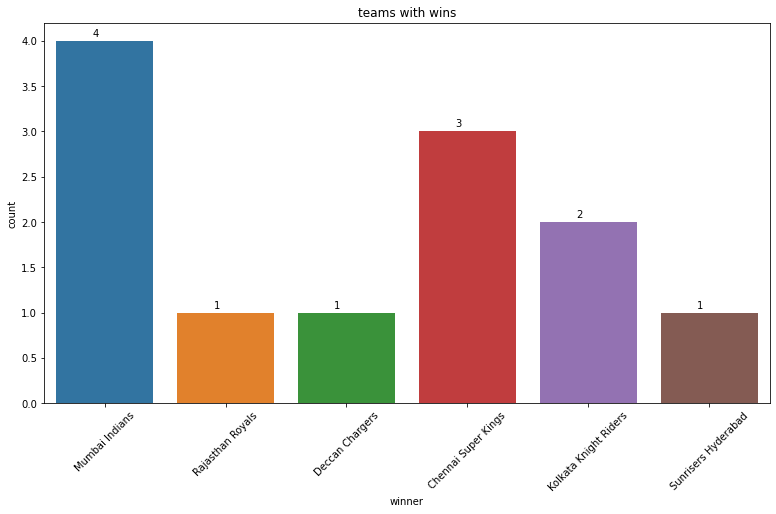

In [31]:
#teams with wins
plt.figure(figsize=(13,7))
ax=sns.countplot(champ['winner'])
plt.title('teams with wins')
plt.xticks(rotation=45,fontsize=10)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+0.05),color='black')
plt.show()

### should i bat or field?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

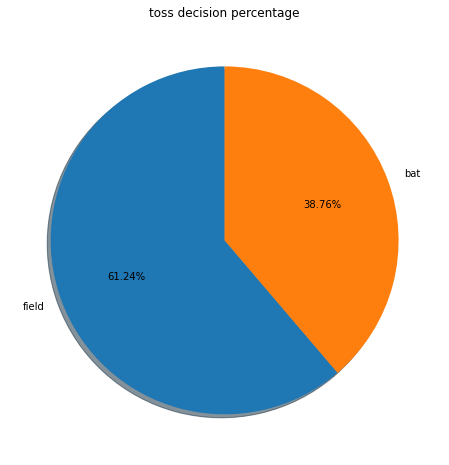

In [32]:
plt.figure(figsize=(10,8))
toss=df.toss_decision.value_counts()
labels=(np.array(toss.index))
sizes=(np.array((toss/toss.sum())*100))
plt.pie(sizes,labels=labels,autopct='%0.2f%%',shadow=True,startangle=90)
plt.title('toss decision percentage')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

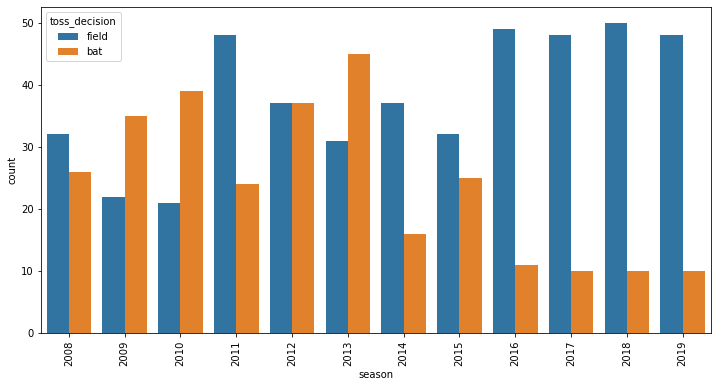

In [33]:
#seasonal toss analysis
plt.figure(figsize=(12,6))
sns.countplot(x='season',hue='toss_decision',data=df)
plt.xticks(rotation='vertical')
plt.show()

In [34]:
df1=pd.read_csv('deliveries.csv')
df1.head()

<IPython.core.display.Javascript object>

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


###

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

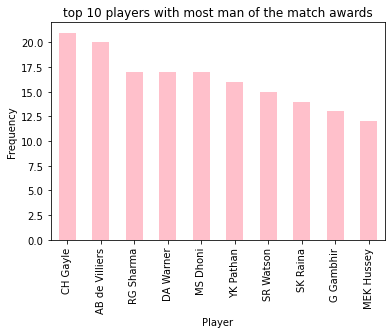

In [36]:
#player performance
mom=df['player_of_match'].value_counts()
mom.head(10).plot(kind='bar',color='pink')
plt.title("top 10 players with most man of the match awards")
plt.ylabel("Frequency")
plt.xlabel("Player");

In [44]:
merge=pd.merge(df1,df,left_on='match_id',right_on='id')
merge


<IPython.core.display.Javascript object>

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176501,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould
176502,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould
176503,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould
176504,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Total Runs scored')

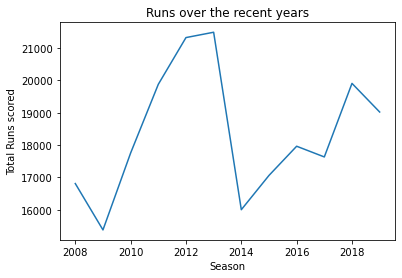

In [45]:
#Have teams been scoring higher in the latest years?
merge.groupby('season')['batsman_runs'].sum().plot(kind='line')
plt.title("Runs over the recent years")
plt.xlabel("Season")
plt.ylabel("Total Runs scored")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Total Runs scored')

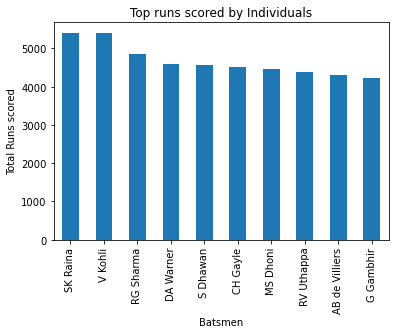

In [46]:
#top runs scored by individuals
temp=merge.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
temp.plot(kind='bar')
plt.title("Top runs scored by Individuals")
plt.xlabel("Batsmen")
plt.ylabel("Total Runs scored")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Total runs scored each season')

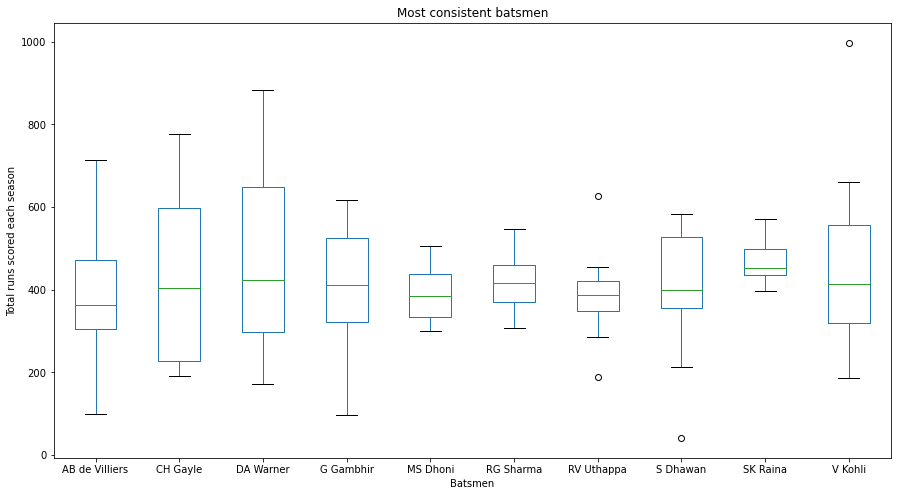

In [47]:
#most consistent batsmen

cb = merge[merge.batsman.isin(temp.index)][['batsman','season','total_runs']]
cb.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind='box',figsize=(15,8))
plt.title("Most consistent batsmen")
plt.xlabel("Batsmen")
plt.ylabel("Total runs scored each season")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Total wickets taken')

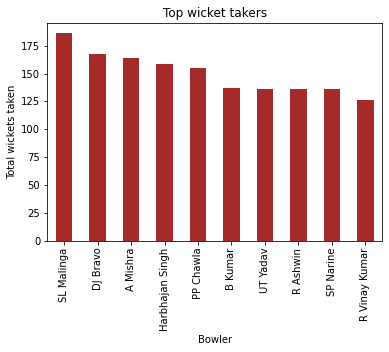

In [48]:
merge.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot(kind='bar',color='brown')
plt.title("Top wicket takers")
plt.xlabel("Bowler")
plt.ylabel("Total wickets taken")

In [49]:
#batsmen with the best strike rate

nb = pd.DataFrame(merge.groupby('batsman')['ball'].count())
runs=pd.DataFrame(merge.groupby('batsman')['batsman_runs'].sum())
season = pd.DataFrame(merge.groupby('batsman')['season'].nunique())

bsr=pd.DataFrame({'balls':nb['ball'],'run':runs['batsman_runs'],'season':season['season']})
bsr.reset_index(inplace=True)

bsr['strike_rate'] = bsr['run']/bsr['balls']*100
highest_sr=bsr[bsr.season.isin([10,11])][['season','batsman','strike_rate']].sort_values('strike_rate',ascending=False)
highest_sr.head(10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,season,batsman,strike_rate
92,11,CH Gayle,145.621378
213,10,KA Pollard,141.930380
112,10,DA Warner,139.787234
444,11,SR Watson,137.384969
449,10,STR Binny,128.059701
72,11,BB McCullum,127.594019
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.530933
53,10,AT Rayudu,124.521806
147,11,G Gambhir,120.005683


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Strike Rate')

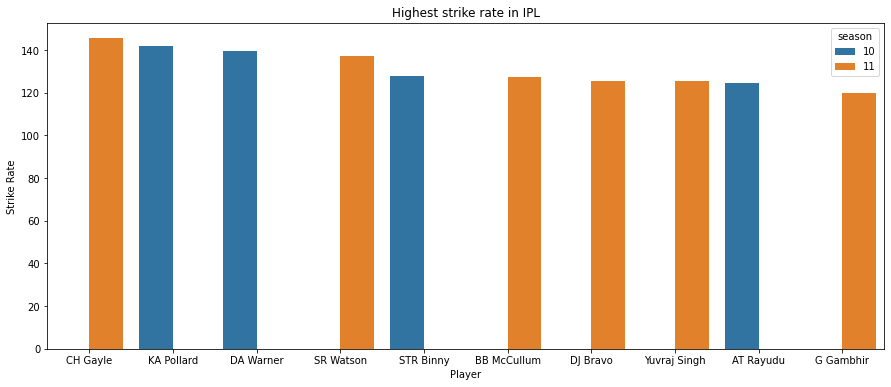

In [50]:
plt.figure(figsize=(15,6))
sns.barplot(x='batsman',y='strike_rate',data=highest_sr.head(10),hue='season')
plt.title("Highest strike rate in IPL")
plt.xlabel("Player")
plt.ylabel("Strike Rate")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

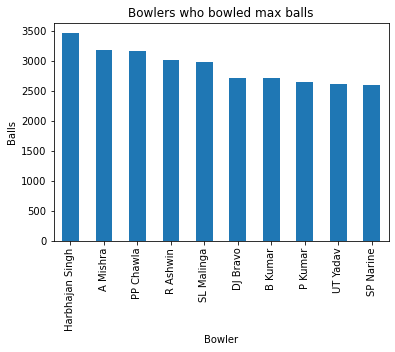

<IPython.core.display.Javascript object>

,Harbhajan Singh,A Mishra,PP Chawla,R Ashwin,SL Malinga,DJ Bravo,B Kumar,P Kumar,UT Yadav,SP Narine
balls bowled,3451,3172,3157,3016,2974,2711,2707,2637,2605,2600


In [52]:
balls=df1['bowler'].value_counts()[:10]
balls.plot(kind='bar')
plt.title("Bowlers who bowled max balls")
plt.xlabel("Bowler")
plt.ylabel("Balls")
plt.show()
balls=pd.DataFrame(balls)
balls['balls bowled']=balls['bowler']
balls.drop('bowler',axis=1,inplace=True)
balls.T

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

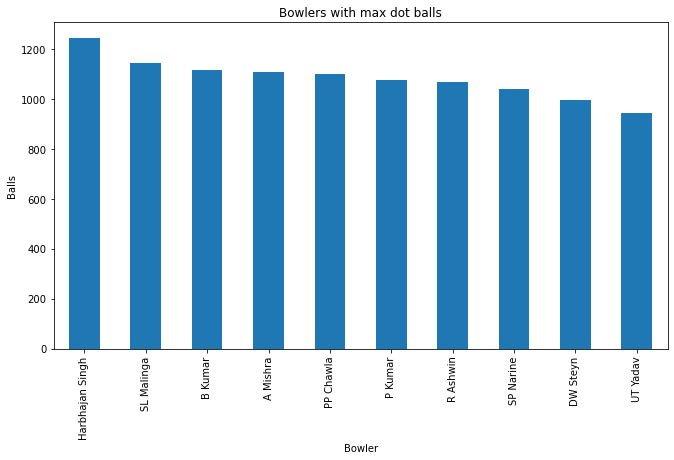

<IPython.core.display.Javascript object>

,Harbhajan Singh,SL Malinga,B Kumar,A Mishra,PP Chawla,P Kumar,R Ashwin,SP Narine,DW Steyn,UT Yadav
bowler,1244,1144,1116,1108,1100,1075,1067,1038,996,942


In [54]:
dotball=df1[df1['total_runs']==0]
dotball=dotball['bowler'].value_counts()[:10]
dotball.plot(kind='bar',figsize=(11,6),title="Bowlers with max dot balls")
plt.xlabel("Bowler")
plt.ylabel("Balls")
plt.show()
dotball=pd.DataFrame(dotball)
dotball.T

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

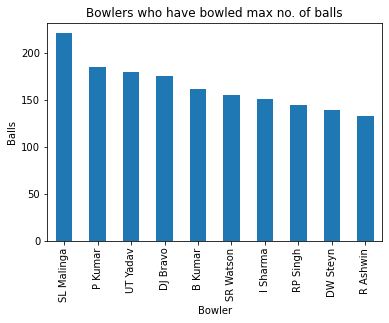

<IPython.core.display.Javascript object>

,SL Malinga,P Kumar,UT Yadav,DJ Bravo,B Kumar,SR Watson,I Sharma,RP Singh,DW Steyn,R Ashwin
bowler,221,185,180,176,162,155,151,145,139,133


In [55]:
extraballs=df1[df1['extra_runs']!=0]['bowler'].value_counts()[:10]
extraballs.plot(kind='bar',title="Bowlers who have bowled max no. of balls")
plt.xlabel("Bowler")
plt.ylabel("Balls")
plt.show()
extraballs=pd.DataFrame(extraballs)
extraballs.T

In [56]:
balls_bowled=pd.DataFrame(merge.groupby('bowler')['ball'].count())
wickets_taken=pd.DataFrame(merge[merge['dismissal_kind']!='no_dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played=pd.DataFrame(merge.groupby('bowler')['season'].nunique())
bowler_sr=pd.DataFrame({'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],'season':seasons_played['season']})
bowler_sr.reset_index(inplace=True)
bowler_sr['strike_rate']=bowler_sr['balls']/bowler_sr['wickets']
def cols(s):
    color='lightblue'
    return 'background-color: %s' % color
best_bowling_sr=bowler_sr[bowler_sr['wickets']>50].sort_values('strike_rate',ascending=True)
best_bowling_sr.head().style.applymap(cols,subset=pd.IndexSlice[:,['bowler','wickets','strike_rate']])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,bowler,balls,wickets,season,strike_rate
134,Imran Tahir,1249,82,6,15.231707
340,SL Malinga,2903,186,9,15.607527
93,DJ Bravo,2711,168,10,16.136905
9,A Nehra,1974,121,9,16.314050
158,JP Faulkner,1243,74,6,16.797297
